In [156]:
# The question we're asking here is this:
# What is the average critic score for each month a movie is released?
# We have ten years worth of data to sort through to find the answer


# importing the appropriate libraries

import json
import pyodbc
import numpy
from matplotlib import pyplot

In [157]:
# declaring sensitive variables provided in separate document.

with open('C:\\Users\\Buyer\\Desktop\\School\\DA 320\\Credentials\\credentials.json') as f:
    data = json.load(f)
    username = data['username']
    password = data['password']

In [158]:
# connecting to the actual database where the data is stored.

conn = pyodbc.connect("Driver={SQL Server};"
                      "Server=THEGARDEN\MSSQLSERVER1;"
                      "Database=PortfolioProject;"
                      "Trusted_Connection=Yes;"
                      "UID=" + username + ";"
                      "PWD=" + password)

In [159]:
# declaring the SQL command we'll use to pull the data.

sql = ("SELECT AVG(score), MONTH(release_date) AS Month FROM dbo.MetacriticMoviesFull GROUP BY MONTH(release_date) ORDER BY Month;")

# Yes, all of that information is already in the database
# since I decided not to enhance the code with to gather all of the data
# and instead uploaded the provided .csv file into MSQL. Thanks prof!


# Here we're executing the SQL code and giving the information a name.
cursor.execute(sql)
rows = cursor.fetchall()

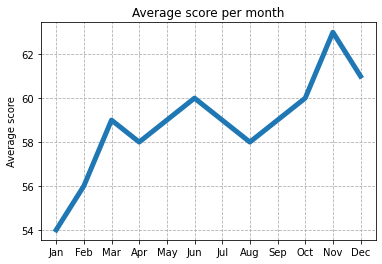

In [174]:
# We could just loop through the 'rows' variable and plt.plot() the results,
# but I've learned that this method will give us fewer customization options.
# Instead, putting both columns of data into their own array,
# and then interating through those arrays, is seemingly more efficient.

scores = []
months = []

for row in rows:
    scores.append(row[0])
    months.append(row[1])

# Now to add some customization.
# Many thanks to this site: https://www.kite.com/python/examples/1870/matplotlib-change-x-axis-tick-labels
# for helping me understand the changing of x-axis labels
# which I utilize below:

positions = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)
labels = ('Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec')
plt.xticks(positions, labels)

plt.title("Average score per month")
plt.ylabel("Average score")
plt.plot(months, scores, linewidth=5)
plt.grid(b=None, which='major', axis='both', linestyle='--')


In [173]:
# As you can see, the average critic score is higher
# if the movie is released towards the end of the calendar year.
# This is in stark contrast to the average score of a movie
# released merely 1-2 months later:
# November = 63 (average)
# January = 54 (average)
# Difference = 9 pts (nearly 10%!)